In [7]:
!pip3 install opencv-python

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.4/46.4 MB 2.3 MB/s eta 0:00:0000:0100:01
You should consider upgrading via the '/Users/macbook/opt/anaconda3/bin/python -m pip install --upgrade pip' command.


In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

from BoundingBox import BoundingBox
from shape_regressor import ShapeRegressor

In [5]:
candidate_pixel_num = 400
fern_pixel_num = 5
first_level_num = 6
second_level_num = 400
landmark_num = 29
initial_number = 20

In [6]:
train_images = []

for i in range(1345):
    train_images.append(cv2.imread(f'/users/macbook/Desktop/data/trainingImages/{i + 1}.jpg', 0))

In [7]:
cv2.imread(f'/users/macbook/Desktop/data/trainingImages/{1}.jpg', 0).shape

(426, 293)

In [8]:
test_images = []

for i in range(507):
    test_images.append(cv2.imread(f'/users/macbook/Desktop/data/testImages/{i + 1}.jpg', 0))

In [9]:
len(test_images), len(train_images)

(507, 1345)

In [10]:
train_ground_trouth_shapes = np.zeros((len(train_images), 29, 2))

with open('/users/macbook/Desktop/data/keypoints.txt', 'r') as file:
    for i in range(1345):
        curr = list(map(float, file.readline().split()))
        train_ground_trouth_shapes[i, :, 0] = np.array(curr[:29])
        train_ground_trouth_shapes[i, :, 1] = np.array(curr[29:])

In [11]:
train_bounding_box_list = []

with open('/users/macbook/Desktop/data/boundingbox.txt', 'r') as file:
    for i in range(1345):
        curr = list(map(int, file.readline().split()))
        train_bounding_box_list.append(BoundingBox(box_shape=np.array(curr[2:]), centroid=np.array(curr[:2])))

In [12]:
len(train_bounding_box_list)

1345

In [13]:
regressor = ShapeRegressor()

In [14]:
regressor.train(train_images, train_ground_trouth_shapes, train_bounding_box_list, first_level_num, second_level_num, candidate_pixel_num, fern_pixel_num, initial_number)

Start training...
Training 1 cascade out of 6


/Users/macbook/Desktop/proga/mts_ml/hw7/Fern.py:78: RuntimeWarning: overflow encountered in ubyte_scalars
  if density_1 - density_2 >= self._threshold[j]:


Fern cascades: 1 out of 6; Ferns 50 out of 400
Fern cascades: 1 out of 6; Ferns 100 out of 400
Fern cascades: 1 out of 6; Ferns 150 out of 400
Fern cascades: 1 out of 6; Ferns 200 out of 400
Fern cascades: 1 out of 6; Ferns 250 out of 400
Fern cascades: 1 out of 6; Ferns 300 out of 400
Fern cascades: 1 out of 6; Ferns 350 out of 400
Fern cascades: 1 out of 6; Ferns 400 out of 400
Training 2 cascade out of 6
Fern cascades: 2 out of 6; Ferns 50 out of 400
Fern cascades: 2 out of 6; Ferns 100 out of 400
Fern cascades: 2 out of 6; Ferns 150 out of 400
Fern cascades: 2 out of 6; Ferns 200 out of 400
Fern cascades: 2 out of 6; Ferns 250 out of 400
Fern cascades: 2 out of 6; Ferns 300 out of 400
Fern cascades: 2 out of 6; Ferns 350 out of 400
Fern cascades: 2 out of 6; Ferns 400 out of 400
Training 3 cascade out of 6
Fern cascades: 3 out of 6; Ferns 50 out of 400
Fern cascades: 3 out of 6; Ferns 100 out of 400
Fern cascades: 3 out of 6; Ferns 150 out of 400
Fern cascades: 3 out of 6; Ferns 20

In [17]:
test_bounding_box_list = []

with open('/users/macbook/Desktop/data/boundingbox_test.txt', 'r') as file:
    for i in range(1345):
        curr = list(map(int, file.readline().split()))
        test_bounding_box_list.append(BoundingBox(box_shape=np.array(curr[2:]), centroid=np.array(curr[:2])))

In [111]:
i = 160

current_shapes = regressor.predict(test_images[i], test_bounding_box_list[i], initial_number)
curr_img = test_images[i]

In [112]:
for shape in current_shapes:
    print(shape)
    cv2.circle(curr_img, shape.astype(int), 3, (255, 0, 0), 1)

[133.14115 134.22265]
[229.8    136.9983]
[168.87425 133.9591 ]
[195.4865 135.3595]
[150.70035 125.55235]
[150.74885 131.47005]
[214.39295 128.3703 ]
[214.4517 134.171 ]
[141.7479 147.0224]
[221.3395  150.21085]
[165.4959 148.7543]
[197.1344 149.9496]
[154.1732 141.7899]
[153.51275 151.40275]
[209.3421 143.4222]
[209.1773  153.37915]
[154.0016  146.24275]
[208.71805 148.12045]
[163.4509 184.2775]
[195.5652 185.4105]
[179.2788  181.42385]
[178.9029 190.5885]
[155.5374 208.8785]
[202.2517 209.894 ]
[178.9118 204.5   ]
[178.9307 209.8335]
[178.3455 214.2625]
[178.1713 221.3735]
[177.46855 250.399  ]


In [113]:
def draw_picture(image, bgr=False):
    #b, g, r = cv2.split(image) # по умолчанию cv2 почему-то отдает цвета в порядке BGR вместо RGB
    #new_image = cv2.merge([r, g, b])
    plt.figure(figsize=(7, 5))
    plt.axis('off')
    plt.imshow(image)
    plt.show()

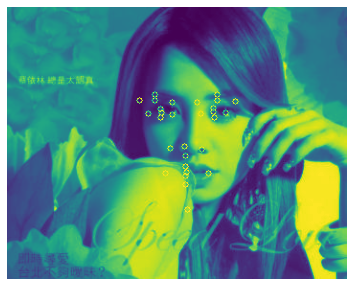

In [63]:
draw_picture(curr_img)

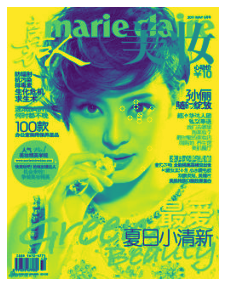

In [45]:
draw_picture(curr_img)